<h1>Model Evaluation and Selection</h1>

**Agenda**

- **Regression Evaluation**
- What is the usage of **classification accuracy**?
- How does a **confusion matrix** describe the performance of a classifier?
- **Precision, Recall, F1-score** and **Fb-Score**
- **ROC, AUC curve**
- Evaluation measures for **multi-class** classification
- **Overfitting** and **Underfitting**
- **Cross-Validation**
- **Learning Curves**
- Searching for optimal tuning parameters using **Grid Search** and **Random Search**

**Load Libs**

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings; warnings.filterwarnings('ignore')

## Regression Evaluation

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

Dataset = load_boston()
X,y = Dataset.data, Dataset.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

clf = LinearRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Mean Absolute Error
<img src='img/eq.jpg' >
<img src='img/mae.png' >

In [4]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.1656052314924792

### Mean Squared Error
<img src="img/eq2.jpg">

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.540218943931553

### R2 Score
<img src='img/r2.png' >

In [6]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.71092035863263026

## Classification Evaluation

### Imbalanced-Data Classification Accuracy
**Dataset Link:** https://www.kaggle.com/mlg-ulb/creditcardfraud <br>
**Alternatively** unzip credit_card_fraud.rar

In [7]:
Dataset = pd.read_csv('credit_card_fraud.csv')
print(Dataset.shape)
Dataset.head(10)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Not Fraud: 284315
Fraud: 492


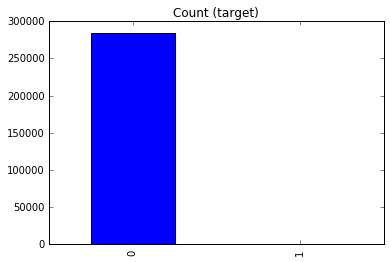

In [9]:
X = Dataset.iloc[:,:-1]
target = Dataset.iloc[:,Dataset.shape[1]-1]

target_count = target.value_counts()
print('Not Fraud:', target_count[0])
print('Fraud:', target_count[1])

target_count.plot(kind='bar', title='Count (target)');

<img src="img/f2.png">

**Logistic Regression**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42, test_size=.3)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = lr.fit(X_train, y_train).predict(X_test)

In [11]:
from sklearn import metrics
print("Accurcy Score: {0}".format(metrics.accuracy_score(y_test, y_pred)))

Accurcy Score: 0.9989466661985184


**Dummy Classifiers**

<img src="img/f3.png">

In [12]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

In [13]:
print("Dummy Score: {0}".format(dummy_majority.score(X_test, y_test)))

Dummy Score: 0.9984082955888721


**Accuracy**

<img src="img/acc.png">

### Confusion matrix

**Example**

<img src="img/conf_ex2.png">

<img src='img/conf_eq.png' >

**Confusion Matrix of Dummy Classifer**

                   Predicted Not Fraud  Predicted Fraud
Actuall Not Fraud                85307                0
Actuall Fraud                      136                0


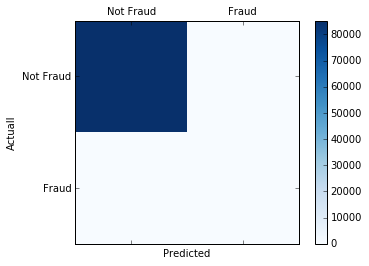

In [14]:
from sklearn.metrics import confusion_matrix

confusion_dummy = confusion_matrix(y_true=y_test, y_pred=y_dummy_predictions)
print(pd.DataFrame(data=confusion_dummy, 
             index=["Actuall Not Fraud","Actuall Fraud"],
             columns =["Predicted Not Fraud","Predicted Fraud"]))


labels = ['Not Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_dummy, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actuall')
plt.show()

**Confusion Matrix of Logistic regression**

                   Predicted Not Fraud  Predicted Fraud
Actuall Not Fraud                85271               36
Actuall Fraud                       54               82


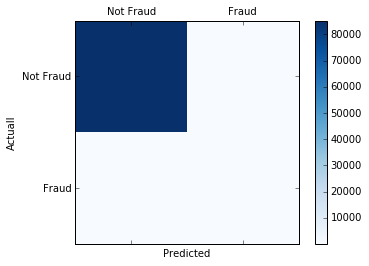

In [15]:
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(pd.DataFrame(data=confusion, 
             index=["Actuall Not Fraud","Actuall Fraud"],
             columns =["Predicted Not Fraud","Predicted Fraud"]))


labels = ['Not Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actuall')
plt.show()

### Precision
How many of the predicted positive examples are really positive?

<img src='img/pre.png' >

### Recall (Sensitivity)
When the actual value is positive, how often is the prediction correct?


<img src='img/re.png' >
<br>
**Trading Off Precision and Recall**<br>
Can be achieved by e.g. varying decision **threshold** of a classifier.

- Suppose we want to predict y=1 only if very **confident**
    - Higher threshold, higher precision, lower recall.

- Suppose we want to **avoid missing** positive examples
    - Lower threshold, higher recall, lower precision.
    
**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **Recall (sensitivity)** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)
<br>

### F1-Score 
**F1-Score** is the **Harmonic Mean** between precision and recall

<img src='img/f1-score.png' >

### Fb-Score
Gives a percentage more **importance/weight** to either **precision** or **recall**

<img src='img/fb-score.png' >

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Score of Logistic Regression Classifer:")
print(pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                        precision_score(y_test, y_pred),
                        recall_score(y_test, y_pred),
                        f1_score(y_test, y_pred)],
                   index=["Accuracy","Precision","Recall","F1-Score"],
                   columns =["Value"]))

print("Score of Dummy Regression Classifer:")
print(pd.DataFrame(data=[accuracy_score(y_test, y_dummy_predictions),
                        precision_score(y_test, y_dummy_predictions),
                        recall_score(y_test, y_dummy_predictions),
                        f1_score(y_test, y_dummy_predictions)],
                   index=["Accuracy","Precision","Recall","F1-Score"],
                   columns =["Value"]))

Score of Logistic Regression Classifer:
              Value
Accuracy   0.998947
Precision  0.694915
Recall     0.602941
F1-Score   0.645669
Score of Dummy Regression Classifer:
              Value
Accuracy   0.998408
Precision  0.000000
Recall     0.000000
F1-Score   0.000000


In [17]:
from sklearn.metrics import classification_report
print("Score of Logistic Regression Classifier:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

print("Score of Dummy Classifier:")
print(classification_report(y_test, y_dummy_predictions, target_names=['Not Fraud', 'Fraud']))

Score of Logistic Regression Classifier:
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     85307
      Fraud       0.69      0.60      0.65       136

avg / total       1.00      1.00      1.00     85443

Score of Dummy Classifier:
             precision    recall  f1-score   support

  Not Fraud       1.00      1.00      1.00     85307
      Fraud       0.00      0.00      0.00       136

avg / total       1.00      1.00      1.00     85443



In [18]:
from sklearn.metrics import fbeta_score
print("Fb-Score: {:.2f}".format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

Fb-Score: 0.81


In [19]:
print("Fb-Score: {:.2f}".format(fbeta_score(y_test, y_pred, average='macro', beta=1)))

Fb-Score: 0.82


In [20]:
for THRESHOLD in np.arange(0.1, 1.0, 0.1):
    preds = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    print ("THRESHOLD= {:.1f}".format(THRESHOLD))
    print(pd.DataFrame(data=[precision_score(y_test, preds),
                   recall_score(y_test, preds),], 
                    index=["Precision", "Recall"],
                    columns =["Value"]))
    print()
    print()

THRESHOLD= 0.1
              Value
Precision  0.123393
Recall     0.705882


THRESHOLD= 0.2
              Value
Precision  0.286624
Recall     0.661765


THRESHOLD= 0.3
              Value
Precision  0.530120
Recall     0.647059


THRESHOLD= 0.4
              Value
Precision  0.685484
Recall     0.625000


THRESHOLD= 0.5
              Value
Precision  0.694915
Recall     0.602941


THRESHOLD= 0.6
              Value
Precision  0.720721
Recall     0.588235


THRESHOLD= 0.7
              Value
Precision  0.750000
Recall     0.551471


THRESHOLD= 0.8
              Value
Precision  0.776596
Recall     0.536765


THRESHOLD= 0.9
              Value
Precision  0.806818
Recall     0.522059




### ROC curves, Area-Under-Curve (AUC)

**Recall (Sensitivity)**
**When the actual value is positive, how often is the prediction correct?**
<img src='img/re.png' >

**Specificity**
**When the actual value is negative, how often is the prediction correct?**
<img src='img/spec.png'>

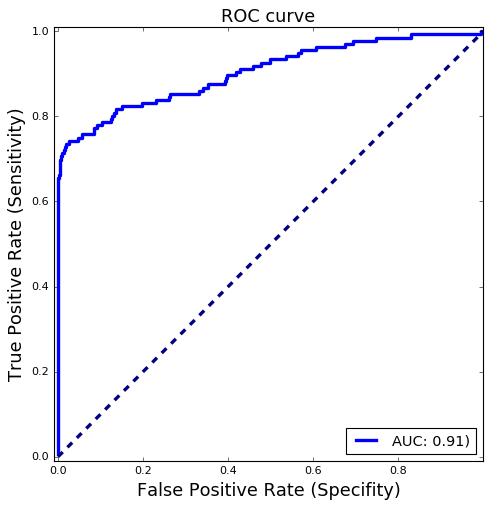

In [26]:
from sklearn.metrics import roc_curve, auc

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='AUC: {:0.2f})'.format(metrics.roc_auc_score(y_test, y_score_lr)))
plt.xlabel('False Positive Rate (Specifity)', fontsize=16)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

**AUC = 0 (worst) AUC = 1 (best)**

**ROC/AUC advantages:**
- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**
- Gives a **single number** for easy comparison.

## Evaluation measures for multi-class classification


**Data Preparation**

In [37]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

**Classification**

In [44]:
clf = RandomForestClassifier(n_estimators=200, max_depth=15,
                             random_state=42).fit(X_train_mc, y_train_mc)

clf_predicted_mc = clf.predict(X_test_mc)

**Confusion Matrix**

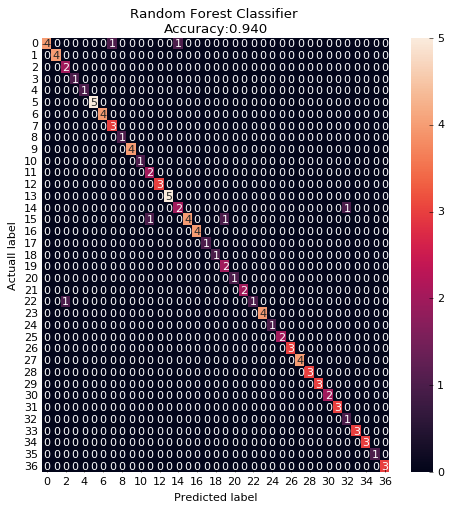

In [45]:
confusion_mc = confusion_matrix(y_test_mc, clf_predicted_mc)

df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,confusion_mc.shape[0])], columns = [i for i in range(0,confusion_mc.shape[1])])

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(df_cm, annot=True)
plt.title('Random Forest Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       clf_predicted_mc)))
plt.ylabel('Actuall label')
plt.xlabel('Predicted label')

In [46]:
print(classification_report(y_test_mc, clf_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       1.00      1.00      1.00         4
          2       0.67      1.00      0.80         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       0.75      1.00      0.86         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       0.67      1.00      0.80         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       0.67      0.67      0.67         3
         17       1.00      0.67      0.80         6
         19       1.00      1.00      1.00         4
         20       1.00      1.00      1.00   

## Overfitting and Underfitting
- Machine Learning models have one sole purpose; to generalize well.<br>
- A model that **generalizes** well is a model that is neither **underfit** nor **overfit.**
- **Generalization** is the model’s ability to give sensible outputs to sets of input that it has never seen before.

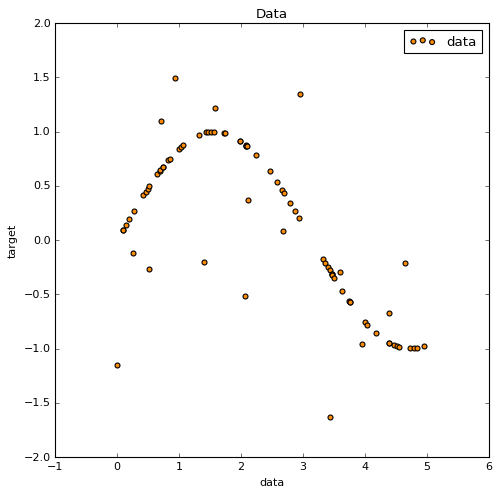

In [51]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


# Plot the results
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Data")
plt.legend()
plt.show()

<br>
<br>
**Overfitting** is the case where the overall cost is really small, but the generalization of the model is unreliable. This is due to the model learning “too much” from the training data set.

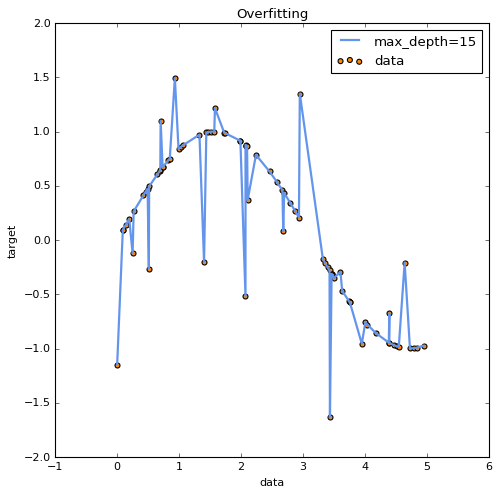

In [52]:
# Fit regression model
clf = DecisionTreeRegressor(max_depth=15)
clf.fit(X, y)

# Predict
y_1 = clf.predict(X)

# Plot the results
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="max_depth=15", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Overfitting")
plt.legend()
plt.show()

**Overfitting** happens when the model is too complex relative to the amount and noisiness of the training data.<br><br>
**Possible Solutions:**
- Simplify the model by selecting one with fewer parameters.
- Gather more training data.
- Reduce the noise in the training data.
- Apply Cross- Validation.

<br>
<br>
**Underfitting** is the case where the model has “ not learned enough” from the training data, resulting in low generalization and unreliable predictions.

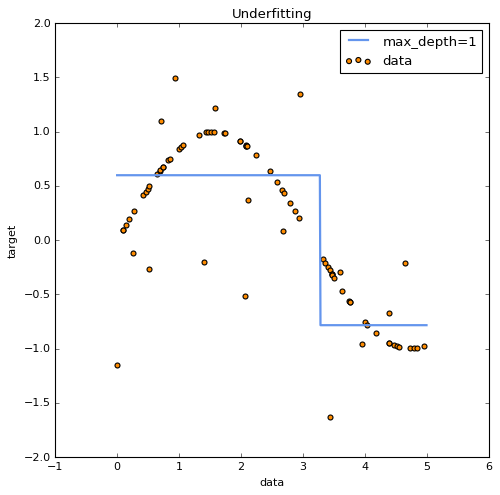

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.9)

# Fit regression model
clf = DecisionTreeRegressor(max_depth=1)
clf.fit(X_train, y_train)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf.predict(X_test)

# Plot the results
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Underfitting")
plt.legend()
plt.show()

**Underfitting** occurs when your model is too simple to learn the underlying structure of the data.<br><br>
**Possible Solutions:**
- Selecting a more powerful model, with more parameters.
- Feeding better features to the learning algorithm.
- Reducing the constraints on the model,
<br>
<br>

## Model selection using evaluation metrics

**Train/test on same data**
   - Typically overfits and likely won't generalize well to new data.
   - **Not recommended**

###  Single train/test split (Holdout)
   - Fast and simple.
   - In most patterns we don't have the **luxury** of large data set.
   - Generally, this split will be close to 80% of the data for training and 20% of the data for testing.
   - Splitting the data set into training and testing sets will leave us with either **insufficient training or testing patterns**. 
   - Clearly the testing data set contains **useful information** for learning. Yet, they are **ignored** and not used for training purposes in the data splitting error rate estimation method.
   - If dataset is not completely even. In splitting our dataset we may end up splitting it in such a way that our training set is very different from the test
<img src='img/holdout.png'>

In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [85]:
digits = load_breast_cancer()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=2233)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86        45
          1       0.89      0.94      0.92        69

avg / total       0.90      0.89      0.89       114



###  K-fold cross-validation
   - K train-test splits.
   - Average metric over all splits.
   - Randomly split our dataset into K equally sized parts.
<br>
<br>

**K-fold cross-validation algorithm**
1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.


<img src='img/k1.png'>

In [86]:
data = load_breast_cancer()
X, y = data.data, data.target

from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

# use recall as scoring metric
scores = cross_val_score(knn, X, y, cv=5, scoring = 'f1')
print('Cross-validation (F1-Score)', scores)
print("Average cross-validation score (F1-Score) : {:.3f}".format(scores.mean()))
print()


Cross-validation (F1-Score) [ 0.91503268  0.95238095  0.95104895  0.95833333  0.94285714]
Average cross-validation score (F1-Score) : 0.944



### RepeatedKFold
-  the most robust of cross validation methods.
- Similar to K-Fold, we set a value for K which signifies the number of times we will train our model. However, in this case K will not represent the number of equally sized partitions.
- on each training iteration, we randomly select points to be for the testing set.
- The advantage of this method over K-Fold is that the proportion of the train-test split is not dependent on the number of iterations.
- The disadvantage of this method is that some points may never be selected to be in the test subset at all — at the same time, some points might be selected multiple times.
<img src='k2.png' >

In [87]:
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedKFold
data = load_breast_cancer()
X, y = data.data, data.target
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

l = []
knn = KNeighborsClassifier(n_neighbors=5)

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    l.append(f1_score(y_test, y_pred))  

print('RepeatedKFold (F1-Score)', l)
print("Average RepeatedKFold score (F1-Score) : {:.3f}".format(sum(l) / len(l)))

RepeatedKFold (F1-Score) [0.9659863945578232, 0.97333333333333327, 0.91666666666666663, 0.965034965034965, 0.92753623188405798, 0.93877551020408156, 0.93877551020408168, 0.9419354838709677, 0.96453900709219853, 0.94117647058823539]
Average RepeatedKFold score (F1-Score) : 0.947


<br>
<br>
### Learning Curves
 - **Train Learning Curve:** Learning curve calculated from the training dataset that gives an idea of how well the model is learning.
 - **Validation Learning Curve:** Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="validation score")

    plt.legend(loc="best")
    return plt

digits = load_digits()
X, y = digits.data, digits.target

**Underfitting:** A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase
<br>
1. Example of Training Learning Curve Showing an Underfit Model That Requires Further Training

In [ ]:
title = "Learning Curves (Naive Bayes)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01))

2. Example of Training Learning Curve Showing An Underfit Model That Does Not Have Sufficient Capacity

In [ ]:
title = "Learning Curves (SVC)"
estimator = SVC(gamma=0.1)
plot_learning_curve(estimator, title, X, y)
plt.show()

**Overfitting:** A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score increases to a point and begins decreasing again.

In [ ]:
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.001, random_state=0)
estimator = DecisionTreeClassifier(random_state=42, max_depth=100)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv)
plt.show()

**Good Fit:** A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

In [ ]:
title = "Learning Curves (SVC)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv)
plt.show()

### Searching for optimal tuning parameters using Grid Search and Random Search
#### Grid Search
<img src='grid.png' >

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='rbf')
grid_values = {'C': [ 0.01, 0.1, 1, 10, 100],
               'gamma': [ 0.005, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf = GridSearchCV(clf, param_grid = grid_values,cv=5, scoring = 'f1_micro')
grid_clf.fit(X_train, y_train)
y_decision_fn_scores = grid_clf.decision_function(X_test) 

print('Grid best score (F1): {:.2f}'.format(grid_clf.best_score_))
print('Grid best parameter (max. F1): ', grid_clf.best_params_)
print('Grid best Estimator: ',grid_clf.best_estimator_)

#### Random Search
<img src='rand.png' >

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_dist = dict(n_neighbors=list(range(1, 200)), weights=['uniform', 'distance']
                  ,algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
                  ,leaf_size=list(range(1, 70)), p = [1,2]
                 )

knn = KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='f1_micro', n_iter=100)
rand.fit(X_train, y_train)
y_decision_fn_scores = rand.predict(X_test) 

print('Grid best score (F1): {:.2f}'.format(rand.best_score_))
print('Grid best parameter (max. F1): ', rand.best_params_)
print('Grid best Estimator: ',rand.best_estimator_)

#### Grid Search vs Random Search
<img src='com.png' >
**Grid Search**
- Works best for lower dimensional data.
- finds the optimal parameter.
- Finds the best soultion.
- Slower.

**Random Search**
- Works best for higher dimensional data.
- The optimal parameter is not found since we do not have it in our grid.
- Finds the near best solution.
- Faster.

<br><br><br><br>
**Comments or Questions?**

- Email: <baghdady.usama@gmail.com>
- Linkedin: www.linkedin.com/in/usama-albaghdady-76944057
- Facebook: www.facebook.com/baghdady.usama